In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from data_utils import day_to_mouse_average, mouse_to_strain_average, total_time_rectangle_bins, pull_locom_tseries_subset, split_data_in_half_randomly

In [2]:
# Make position density first mouse first day
CT = np.load('data/txy_coords/CT/CT_strain0_mouse0_day0.npy')
CX = np.load('data/txy_coords/CX/CX_strain0_mouse0_day0.npy')
CY = np.load('data/txy_coords/CY/CY_strain0_mouse0_day0.npy')

# mask for HB Move Events
CT_NHB = np.load('data/txy_coords/C_idx_HB/C_idx_HB_strain0_mouse0_day0.npy')
CT_HB = ~ CT_NHB

In [3]:
start_time, stop_time = np.load('data/txy_coords/recordingStartTimeEndTime/recordingStartTimeEndTime_strain0_mouse0_day0.npy')

In [4]:
# Cage boundaries
YLower = 1.0; YUpper = 43.0; XUpper = 3.75; XLower = -16.25
xbins = 12; ybins = 24
M = np.vstack([CT, CX, CY])
pos_subset = pull_locom_tseries_subset(M, start_time, stop_time)
bin_times = total_time_rectangle_bins(pos_subset, xlims=(XLower, XUpper), ylims=(YLower, YUpper), xbins=xbins, ybins=ybins)
position_pdf = bin_times / bin_times.sum()

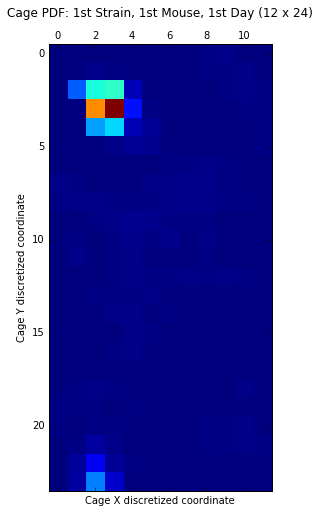

In [5]:
plt.figure(figsize=(1, 2))
plt.matshow(position_pdf)
plt.title('Cage PDF: 1st Strain, 1st Mouse, 1st Day (12 x 24)')
plt.xlabel('Cage X discretized coordinate')
plt.ylabel('Cage Y discretized coordinate')
plt.savefig('12x24.pdf')

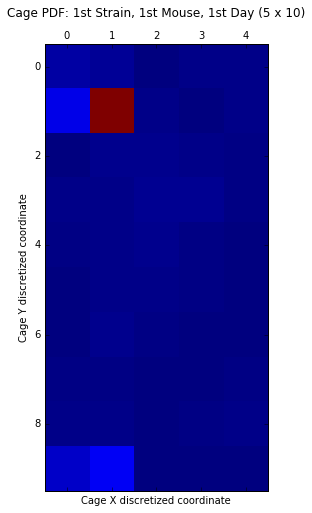

In [6]:
bin_times = total_time_rectangle_bins(pos_subset, xlims=(XLower, XUpper), ylims=(YLower, YUpper), xbins=5, ybins=10)
position_pdf = bin_times / bin_times.sum()

plt.matshow(position_pdf)
plt.title('Cage PDF: 1st Strain, 1st Mouse, 1st Day (5 x 10)')
plt.xlabel('Cage X discretized coordinate')
plt.ylabel('Cage Y discretized coordinate')

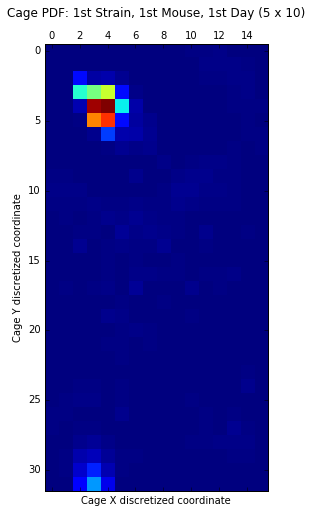

In [7]:
bin_times = total_time_rectangle_bins(pos_subset, xlims=(XLower, XUpper), ylims=(YLower, YUpper), xbins=16, ybins=32)
position_pdf = bin_times / bin_times.sum()

plt.matshow(position_pdf)
plt.title('Cage PDF: 1st Strain, 1st Mouse, 1st Day (5 x 10)')
plt.xlabel('Cage X discretized coordinate')
plt.ylabel('Cage Y discretized coordinate')

In [8]:
CX[:5]

array([-10.76 , -10.76 , -11.046, -11.548, -10.979])

In [9]:
CY[:5]

array([ 36.113,  36.113,  37.078,  36.189,  37.033])

In [28]:
sum(np.diff(CT) <= 1)


32180

In [30]:
len(np.diff(CT))

39180

In [31]:
len(CT)

39181

In [12]:
same_coord = np.diff(CX) == 0

In [13]:
CT[:5]

array([ 49529.76,  49530.89,  49696.73,  49698.51,  49706.59])

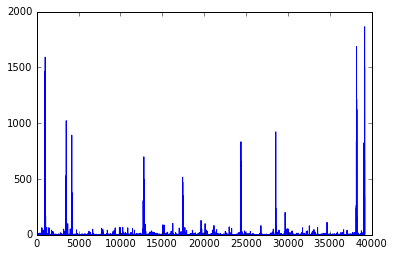

In [14]:
plt.plot(np.diff(CT))

(array([ 1105.,  4737.,  8044.,  5175.,  3672.,  3005.,  3330.,  3866.,
         4269.,  1978.]),
 array([-16.25, -14.25, -12.25, -10.25,  -8.25,  -6.25,  -4.25,  -2.25,
         -0.25,   1.75,   3.75]),
 <a list of 10 Patch objects>)

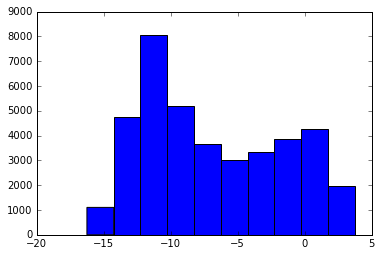

In [15]:
plt.hist(CX)

(array([ 5627.,  4385.,  2884.,  2494.,  2609.,  3172.,  5552.,  4047.,
         6454.,  1957.]),
 array([  0.4 ,   4.66,   8.92,  13.18,  17.44,  21.7 ,  25.96,  30.22,
         34.48,  38.74,  43.  ]),
 <a list of 10 Patch objects>)

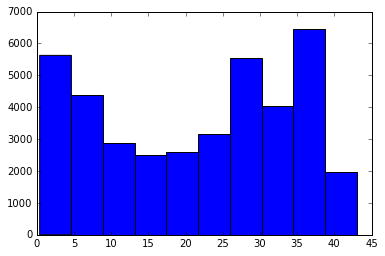

In [16]:
plt.hist(CY)

In [17]:
min(CX), max(CX)

(-16.25, 3.75)

In [18]:
min(CY), max(CY)

(0.40000000000000002, 43.0)

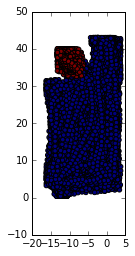

In [19]:
plt.scatter(CX, CY, c=CT_HB)
plt.axes().set_aspect('equal')

In [20]:
def path(X, Y, T, HB):
    path = []
    
    # inital point
    i = 0
    while i <= len(X) - 2:
        if HB[i] and HB[i + 1]:
            i += 1
        elif HB[i] and not HB[i + 1]:
            start_index = i
            i += 1
            while not HB[i]:
                i += 1
            end_index = i
            path.append([start_index, end_index])
        i += 1
    
    return(path)

In [21]:
paths = path(CX, CY, CT, CT_HB)

In [22]:
len(paths)

67

In [23]:
start2, end2 = paths[20]

(1.0, 43.0)

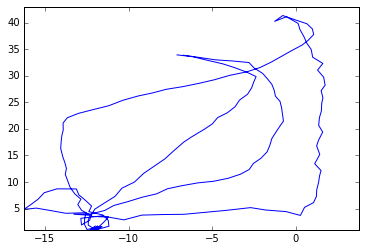

In [24]:
plt.plot(CX[start2:(end2 + 1)], CY[start2:(end2 + 1)])
plt.xlim(XLower, XUpper)
plt.ylim(YLower, YUpper)

In [ ]:
def path(X, Y, T, threshold):
    path_group = np.zeros(len(X))
    
    group = 1
    while 